In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def show_image(image, title='Image', cmap_type='gray'):
    plt.figure(figsize=(20,10))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('on')
    plt.show()

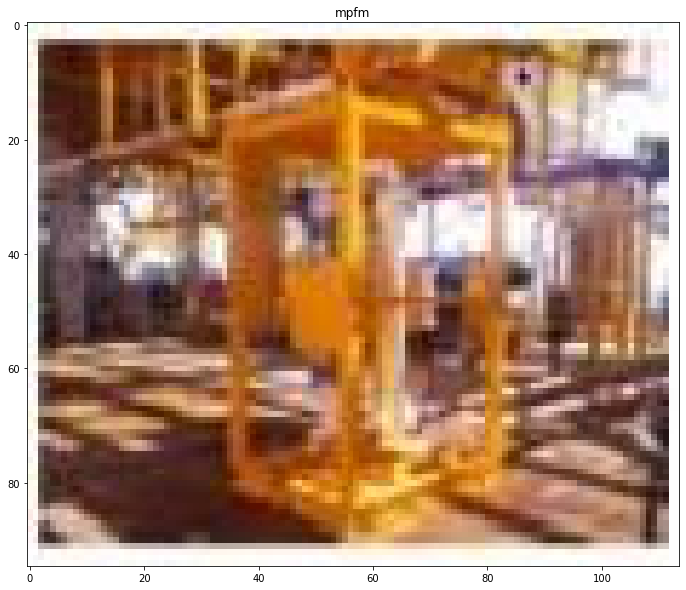

In [13]:
url1 = 'D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\img\mpfm.jpg'

img = plt.imread(url1)

show_image(img, 'mpfm')

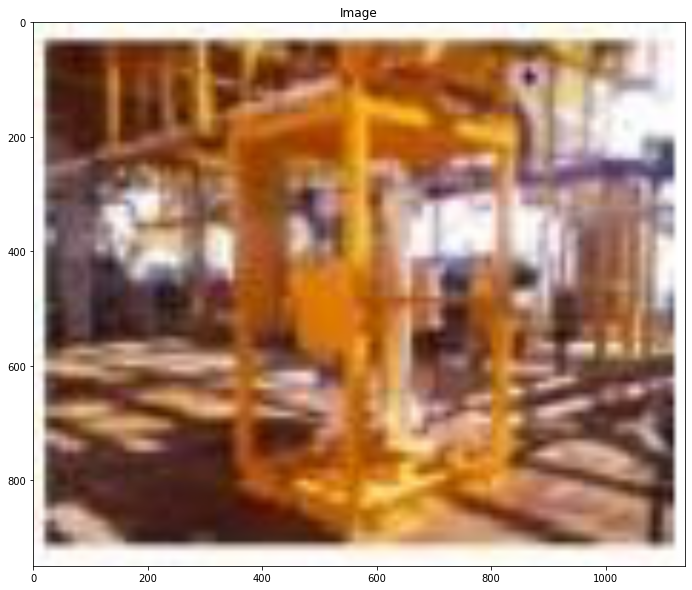

In [40]:
from skimage.transform import rescale

img_resc = rescale(img, 10, anti_aliasing=False, multichannel=True)

show_image(img_resc)

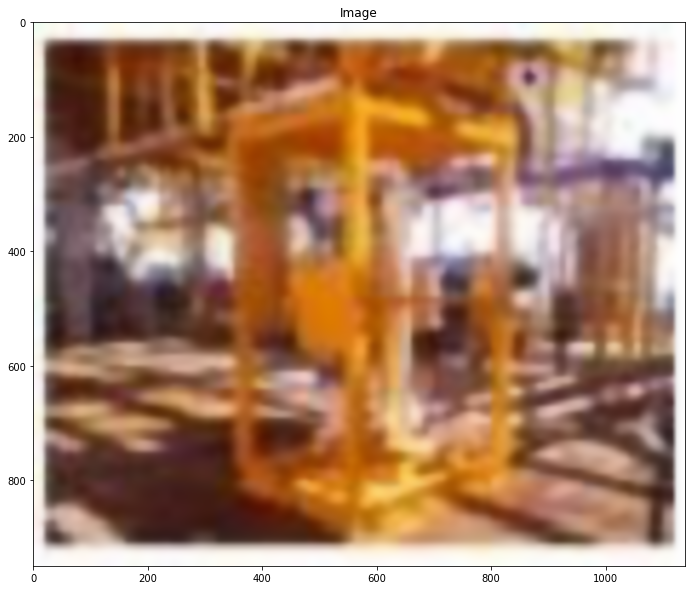

In [45]:
from skimage.restoration import denoise_tv_chambolle

denoised_img = denoise_tv_chambolle(img_resc, weight=0.3,multichannel=True)

show_image(denoised_img)

url2 = 'D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\img\mpfm2.jpg'

plt.imsave(url2,denoised_img)

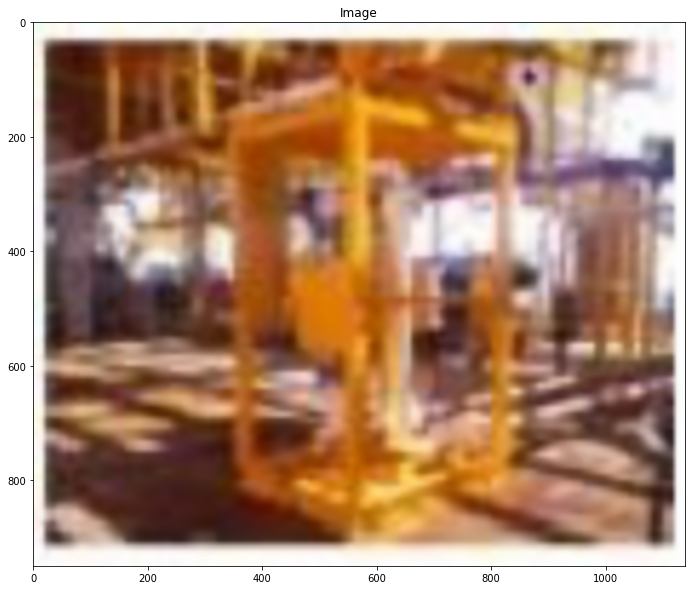

In [46]:
from skimage.restoration import denoise_bilateral

denoised_img = denoise_tv_chambolle(img_resc, multichannel=True)

show_image(denoised_img)

url2 = 'D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\img\mpfm3.jpg'

plt.imsave(url2,denoised_img)

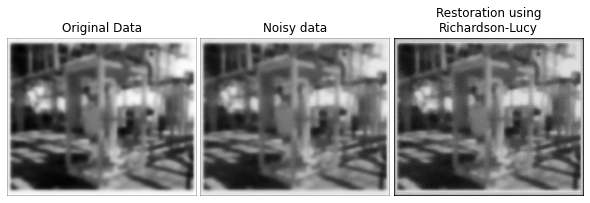

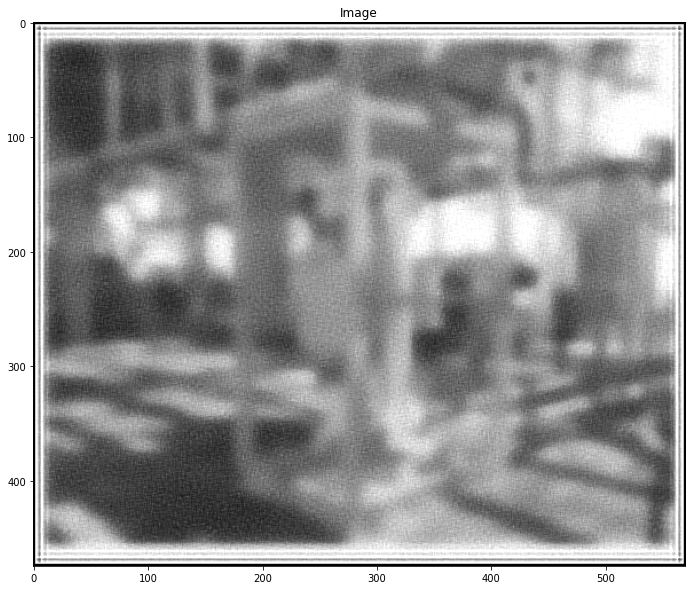

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

astro = color.rgb2gray(denoised_img)

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()
show_image(deconvolved_RL)

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


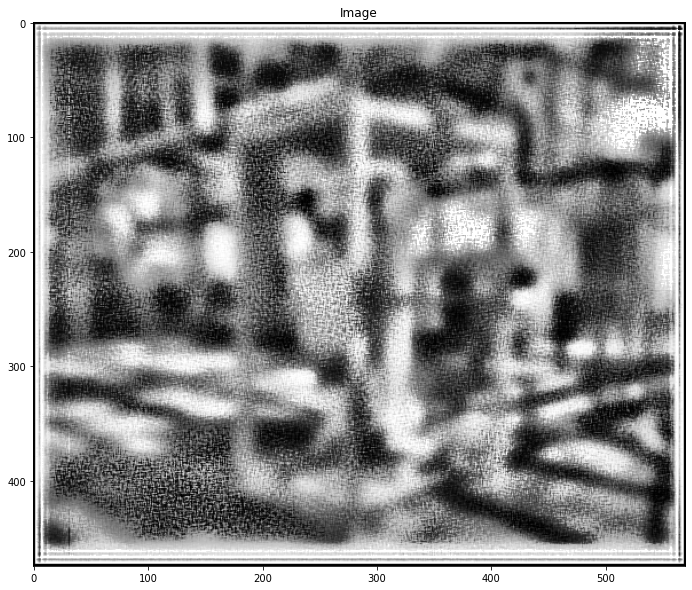

In [36]:
from skimage import exposure
from skimage import color

#grayscaled = color.rgb2gray(denoised_img)

img_adapteq = exposure.equalize_adapthist(deconvolved_RL, clip_limit=0.3)

show_image(img_adapteq)

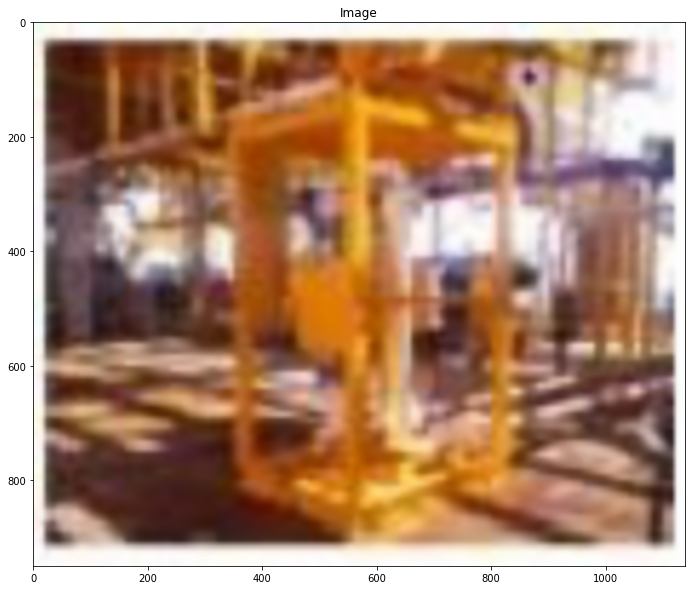

In [44]:
from skimage.restoration import denoise_tv_chambolle

denoised_img = denoise_tv_chambolle(img_resc, weight=0.1,multichannel=True)

show_image(denoised_img)

url2 = 'D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\img\mpfm2.jpg'

plt.imsave(url2,denoised_img)


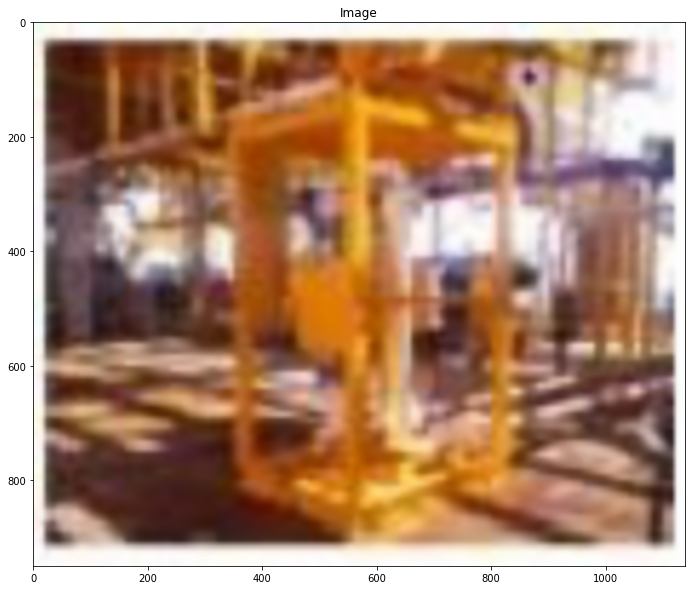

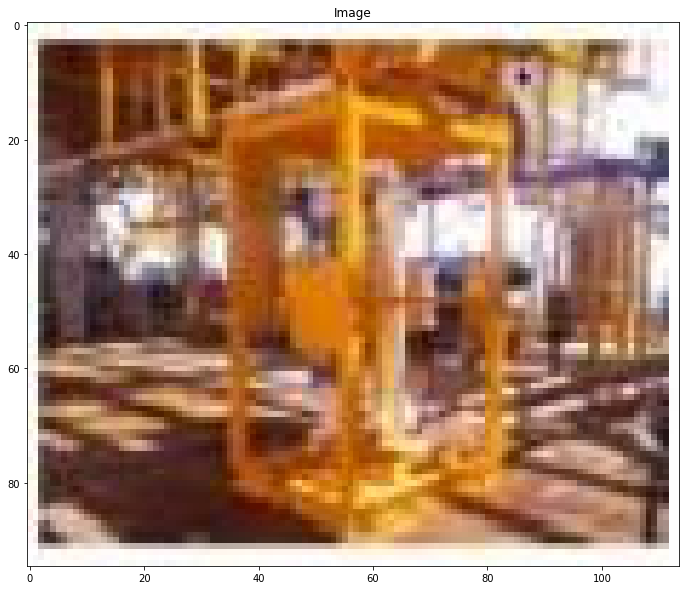

In [47]:
show_image(denoised_img)
show_image(img)